In [216]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
import scipy.linalg as la
import sklearn.datasets as dt
from sklearn.metrics import confusion_matrix

In [88]:
respostas = pickle.load(open('A42921_Ficha4_Respostas.p','rb'))
respostas

{'Q001': array([[-1., -1., -1., -1.],
        [-1., -1., -1., -1.]]),
 'Q002': array([[-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.]]),
 'Q003': array([[-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.]]),
 'nome': 'Fábio Alexandre Cruz Silva Dias',
 'numero': 'A42921'}

## Exercício 1

In [2]:
D = pickle.load(open('A42921_Q001_data.p', 'rb'))

In [6]:
x = D['x']
y = D['y']
folds = D['folds']

In [16]:
print(x.shape)
print(y.shape)

(258,)
(258,)


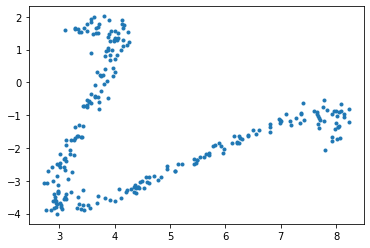

In [23]:
plt.plot(x, y, '.')

### a)

In [71]:
xTrain = x[folds==1]
xTest = x[folds==0]

yTrain = y[folds==1]
yTest = y[folds==0]

In [27]:
# plt.plot(xTrain, yTrain, '.')
# plt.plot(xTest, yTest, '.')

#### i)

In [72]:
X = np.vstack((np.ones(xTrain.shape[0]), xTrain, xTrain ** 2, xTrain ** 3, xTrain ** 4)) #Adicionar a coordenada homogénea

Rx = np.dot(X, X.T)
rxy = np.dot(X, yTrain.T)
w = np.dot(la.pinv(Rx), rxy)

print(w)

[-136.60848329  106.03027175  -29.79949353    3.574257     -0.15519078]


In [77]:
ye = np.dot(w.T, X)
e = yTrain - ye

m = np.mean(y)
Vtot = np.mean((y - m) ** 2) #Variância total de Y
Pe = np.mean(e ** 2) #Potência do erro
R2 = 1 - Pe / Vtot

print(R2)

0.4247119312849993


#### ii)

In [78]:
X2 = np.vstack((np.ones(xTest.shape[0]), xTest, xTest ** 2, xTest ** 3, xTest ** 4)) #Adicionar a coordenada homogénea

y2e = np.dot(w.T, X2)

e = yTest - y2e

m = np.mean(y)
Vtot = np.mean((y - m) ** 2) #Variância total de Y
Pe = np.mean(e ** 2) #Potência do erro
R2 = 1 - Pe / Vtot

print(R2)

0.2794618063972192


### a) R: iv [3]

### b)

In [66]:
xTrain = x[folds==0]
xTest = x[folds==1]

yTrain = y[folds==0]
yTest = y[folds==1]

#### i)

In [79]:
X = np.vstack((np.ones(xTrain.shape[0]), xTrain, xTrain ** 2, xTrain ** 3)) #Adicionar a coordenada homogénea

Rx = np.dot(X, X.T)
rxy = np.dot(X, yTrain.T)
w = np.dot(la.pinv(Rx), rxy)

print(w)

[-40.40271266  23.51451139  -4.42982065   0.26374428]


In [84]:
ye = np.dot(w.T, X)
e = yTrain - ye

m = np.mean(y)
Vtot = np.mean((y - m) ** 2) #Variância total de Y
Pe = np.mean(e ** 2) #Potência do erro
R2 = 1 - Pe / Vtot

print(mean_absolute_error(yTrain, ye))

1.1279914931424555


#### ii)

In [86]:
w[0]

-40.40271265886968

### b) R: iv [3]

## Exercicio 2

In [97]:
D = dt.load_diabetes()

In [103]:
X = D.data
y = D.target

In [104]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [108]:
X1 = X[:295, :]
y1 = y[:295]

X2 = X[295: , :]
y2 = y[295:]

In [109]:
print(X1.shape)
print(y1.shape)
print(X2.shape)
print(y2.shape)

(295, 10)
(295,)
(147, 10)
(147,)


### a)

#### i)

In [114]:
l = Lasso(random_state=42,alpha=0.01)
l.fit(X1, y1)

l.score(X2, y2)

0.5079024904662877

#### ii)

In [117]:
np.sum(np.abs(l.coef_) > 212)

5

### a) R: iv  [3]

### b)

#### i)

In [119]:
poly = PolynomialFeatures(degree = 3).fit(X1)
X1a = poly.transform(X1)
X2a = poly.transform(X2)

rl = LinearRegression().fit(X1a, y1)
print(len(rl.coef_) + 1)

287


#### ii)

In [120]:
poly = PolynomialFeatures(degree = 4).fit(X1)
X1a = poly.transform(X1)
X2a = poly.transform(X2)

rl = LinearRegression().fit(X1a, y1)
print(len(rl.coef_) + 1)

1002


### b) R: iv [3]

### c)

In [151]:
poly = PolynomialFeatures(degree = 2).fit(X1)
X1a = poly.transform(X1)
X2a = poly.transform(X2)

rl = LinearRegression().fit(X1a, y1)

y1e = rl.predict(X1a)
y2e = rl.predict(X2a)

#### i)

In [152]:
mean_squared_error(y2e, y2)

3455.347358254986

#### ii)

In [153]:
mean_squared_error(y1e, y1)

2271.4232828899844

### c) R: ii [1]

## Exercício 3

In [157]:
D = pickle.load(open('A42921_Q003_data.p', 'rb'))

In [158]:
D.keys()

dict_keys(['y', 'X'])

In [179]:
X = D['X']
y = D['y']

In [168]:
print(X.shape)
print(y.shape)

(2, 2163)
(2163,)


### a)

#### i)

In [180]:
# Dados fornecidos
w = np.array([0.00, 0.95, -0.31])

# Adicionar uma linha de 1's para a coordenada constante w0
X_com_constante = np.row_stack((np.ones(X.shape[1]), X))

# Calcular as saídas previstas
y_pred = np.dot(w, X_com_constante)

# Aplicar a função de decisão para obter as classes previstas (1 ou -1)
classes_pred = np.where(y_pred >= 0, 1, -1)

# Calcular o número total de acertos
num_acertos = np.sum(classes_pred == y)

print(f"Número total de acertos: {num_acertos}")


Número total de acertos: 1401


#### ii)

In [184]:
from sklearn.metrics import recall_score

# ... Seus dados e código anterior ...

# Calcular o recall
# Ajuste average para 'micro', 'macro', 'weighted', ou deixe como None para obter o recall para cada classe separadamente
recall = recall_score(y, classes_pred, average='micro')

print(f"Valor do recall: {recall}")

Valor do recall: 0.6477115117891817


#### iii)

In [188]:
# Calcular o número de erros na classe w0
num_erros_w0 = np.sum((classes_pred == -1) & (y == 1))

print(f"Número de erros na classe w0: {num_erros_w0}")

Número de erros na classe w0: 145


#### iv)

In [187]:
# Calcular o número de erros na classe w1
num_erros_w1 = np.sum((classes_pred == 1) & (y == -1))

print(f"Número de erros na classe w1: {num_erros_w1}")

Número de erros na classe w1: 0


### Manual

In [219]:
X = D['X']
y = D['y']

In [220]:
w = np.array([0.00, 0.95, -0.31])
Xa = np.vstack((np.ones(X.shape[1]), X))

yb = w.T * Xa.T

ye = np.argmax(yb, axis=0)

In [221]:
ye

array([   0,  729, 1348], dtype=int64)

#### i)

In [222]:
print("Número Total de Erros: ", np.sum(y!=ye))
print(confusion_matrix(y, ye))

Número Total de Erros:  1


<ipython-input-222-30f2dafe54a9>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print("Número Total de Erros: ", np.sum(y!=ye))


ValueError: Found input variables with inconsistent numbers of samples: [2163, 3]

In [238]:
Y = -np.ones((2, X.shape[1]))

for i in range(2):
    Y[i, y==i] = 1
    
Rx = np.dot(X, X.T)
rxy = np.dot(X, Y.T)
W = np.dot(la.pinv(Rx), rxy)

yb = np.dot(W.T, X)
ye = np.argmax(yb, axis=0)

In [239]:
ye

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [240]:
print("Número Total de Acertos: ", np.sum(y==ye))
print(confusion_matrix(y, ye))

Número Total de Acertos:  2136
[[ 610    7]
 [  20 1526]]


In [243]:
from sklearn.metrics import recall_score

# Supondo que y_real e classes_pred são arrays com as classes reais e preditas, respectivamente
# Suponha que as classes são 1 e -1

# Calcular o recall para a classe 1 (positiva)
recall_classe_positiva = recall_score(y, classes_pred, pos_label=1)

# Calcular o recall para a classe -1 (negativa)
recall_classe_negativa = recall_score(y, classes_pred, pos_label=-1)

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

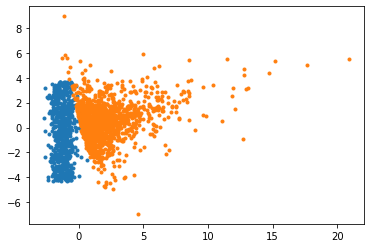

In [268]:
plt.plot(X[0, y==0], X[1, y==0], '.')
plt.plot(X[0, y==1], X[1, y==1], '.')

In [276]:
poly = PolynomialFeatures(1).fit(X.T)
Xp = poly.transform(X.T).T

Y = -np.ones((2, X.shape[1]))

for i in range(2):
    Y[i, y==i] = 1
    
Rx = np.dot(Xp, Xp.T)
rxy = np.dot(Xp, Y.T)
W = np.dot(la.pinv(Rx), rxy)

yb = np.dot(W.T, Xp)
ye = np.argmax(yb, axis=0)

In [291]:
X = D['X']
y = D['y']

In [292]:
w = np.array([0.00, 0.95, -0.31]).T
ye = w[0]*X + w[1]*X + w[2]*X

In [302]:
print(ye.shape)
print(y.shape)

plt.plot(X[0, ye[0, :]], X[1, ye[1, :]], 'ok', alpha=0.3)

(2, 2163)
(2163,)


IndexError: arrays used as indices must be of integer (or boolean) type

In [295]:
confusion_matrix(y, ye)

ValueError: Found input variables with inconsistent numbers of samples: [2163, 2]

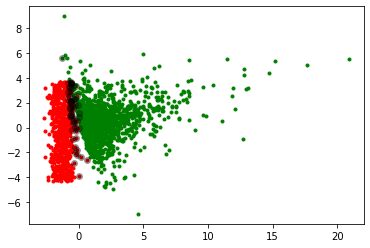

In [281]:
plt.plot(X[0, y==0], X[1, y==0], '.r')
plt.plot(X[0, y==1], X[1, y==1], '.g')
plt.plot(X[0, y!=ye], X[1, y!=ye], 'ok', alpha=0.3)

# Preenchimento das Respostas

### Exercício 1

In [94]:
q001 = respostas['Q001']
q002 = respostas['Q002']
q003 = respostas['Q003']

In [91]:
q001[:, :] = 0

q001[0, 3] = 1
q001[1, 3] = 1

q001

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.]])

### Exercício 2

In [303]:
q002[:, :] = 0

q002[0, 3] = 1
q002[1, 3] = 1
q002[2, 1] = 1

q002

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

### Exercício 3

In [116]:
q003[:, :] = 0

q003[0, 0] = 1
q003[1, 3] = 1
q003[2, 3] = 1

q003

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [304]:
respostas['Q001'] = q001
respostas['Q002'] = q002
respostas['Q003'] = q003

respostas

{'Q001': array([[0., 0., 0., 1.],
        [0., 0., 0., 1.]]),
 'Q002': array([[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.]]),
 'Q003': array([[-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.]]),
 'nome': 'Fábio Alexandre Cruz Silva Dias',
 'numero': 'A42921'}

In [118]:
pickle.dump(respostas,open('A42921_Ficha4_Respostas.p','wb'))

In [119]:
a = pickle.load(open('A42921_Ficha4_Respostas.p','rb'))

a

{'Q001': array([[0., 0., 0., 1.],
        [1., 0., 0., 0.]]),
 'Q002': array([[0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 'Q003': array([[1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]]),
 'nome': 'Fábio Alexandre Cruz Silva Dias',
 'numero': 'A42921'}